# Lab 7 - Event Selection Optimalization

##### PHYS434 - Advanced Laboratory: Computational Data Analysis
##### Professor: Miguel Morales
<br>

##### Due date: 12/6/2021
##### By Erik Solhaug
<br>

In this lab, we will explore our data and apply confidence intervals.

From the previous lab, we have the data presented below.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
import pickle
import math

import pandas as pd

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (20,15)

In [2]:
user_dir = '/home/jovyan/Phys434_Autumn2021/'
data_dir = user_dir + 'LHC_data/'
data_dir

'/home/jovyan/Phys434_Autumn2021/LHC_data/'

In [3]:
with open(f'{data_dir}/higgs_100000_pt_250_500.pkl', 'rb') as f:
    higgs = pickle.load(f)

In [4]:
with open(f'{data_dir}/qcd_100000_pt_250_500.pkl', 'rb') as f:
    qcd = pickle.load(f)

In [5]:
higgs

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,472.074292,0.137052,-2.535145,125.150365,0.126581,0.002633,1.298020,0.008218,0.739787,0.283689,0.174944,0.383474,0.616674,0.557407
1,470.405678,-0.039157,0.069669,130.552672,0.118071,0.002379,1.445626,0.013822,0.747927,0.234281,0.193354,0.313240,0.825308,0.704650
2,438.008357,-0.181139,-3.031083,125.703063,0.167344,0.004623,0.986597,0.004545,1.001379,0.440523,0.218649,0.439917,0.496338,0.487496
3,484.860421,0.251986,2.855706,126.215853,0.119238,0.002066,1.218467,0.006740,0.761892,0.228160,0.193810,0.299465,0.849449,0.594872
4,486.141137,-1.917812,-2.221953,132.182504,0.103632,0.001438,1.291784,0.000398,0.722656,0.166851,0.148080,0.230886,0.887497,0.678118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,478.658254,-0.837586,-2.609921,125.707302,0.138041,0.001494,0.567994,0.000953,1.192189,0.131294,0.109689,0.110129,0.835446,0.504678
99996,465.171259,0.429341,-1.446681,129.749906,0.135890,0.002071,0.825176,0.005110,0.751448,0.140336,0.115123,0.186755,0.820334,0.586032
99997,466.920808,-0.805493,-0.754703,49.069161,0.020281,0.000121,14.506839,0.004768,0.864723,0.568722,0.395942,0.657693,0.696196,0.018073
99998,471.611853,0.801813,-3.077883,117.186361,0.102276,0.002399,2.242231,0.006947,0.759346,0.318427,0.274153,0.419343,0.860960,0.641892


In [6]:
qcd

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,489.631389,1.955969,1.803007,125.298720,0.099409,0.003247,3.304886,0.000528,0.846096,0.586658,0.439468,0.693370,0.749105,0.333731
1,401.041884,-1.170413,0.188817,88.047054,0.101181,0.002527,2.439089,0.001561,0.852379,0.517657,0.336052,0.607308,0.649178,0.477481
2,447.487556,1.861736,-2.326646,85.794174,0.069372,0.001375,4.118371,0.000197,0.979133,0.815123,0.700152,0.832495,0.858953,0.117091
3,402.652836,1.276421,-1.124176,42.947328,0.032095,0.000266,8.038338,0.001144,1.020193,0.664347,0.617499,0.651197,0.929482,0.054606
4,484.257672,-1.272225,1.966794,59.542227,0.038348,0.000358,6.353842,0.001619,0.875408,0.436270,0.376816,0.498362,0.863723,0.095201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,418.171225,1.804938,-1.555512,67.399102,0.047555,0.000669,6.216951,0.000335,0.794253,0.734325,0.533141,0.924548,0.726028,0.039376
99996,492.119236,-0.037258,0.037888,90.775772,0.095329,0.001090,1.258409,0.005327,0.849051,0.285315,0.177652,0.336041,0.622651,0.321335
99997,492.932552,-0.912632,0.578690,106.611253,0.078793,0.002331,4.764786,0.004449,0.951293,0.789768,0.620329,0.830205,0.785457,0.053165
99998,402.673975,-1.736921,-2.103913,66.278542,0.066585,0.000851,2.881152,0.000324,0.831466,0.488685,0.429960,0.587739,0.879831,0.212806


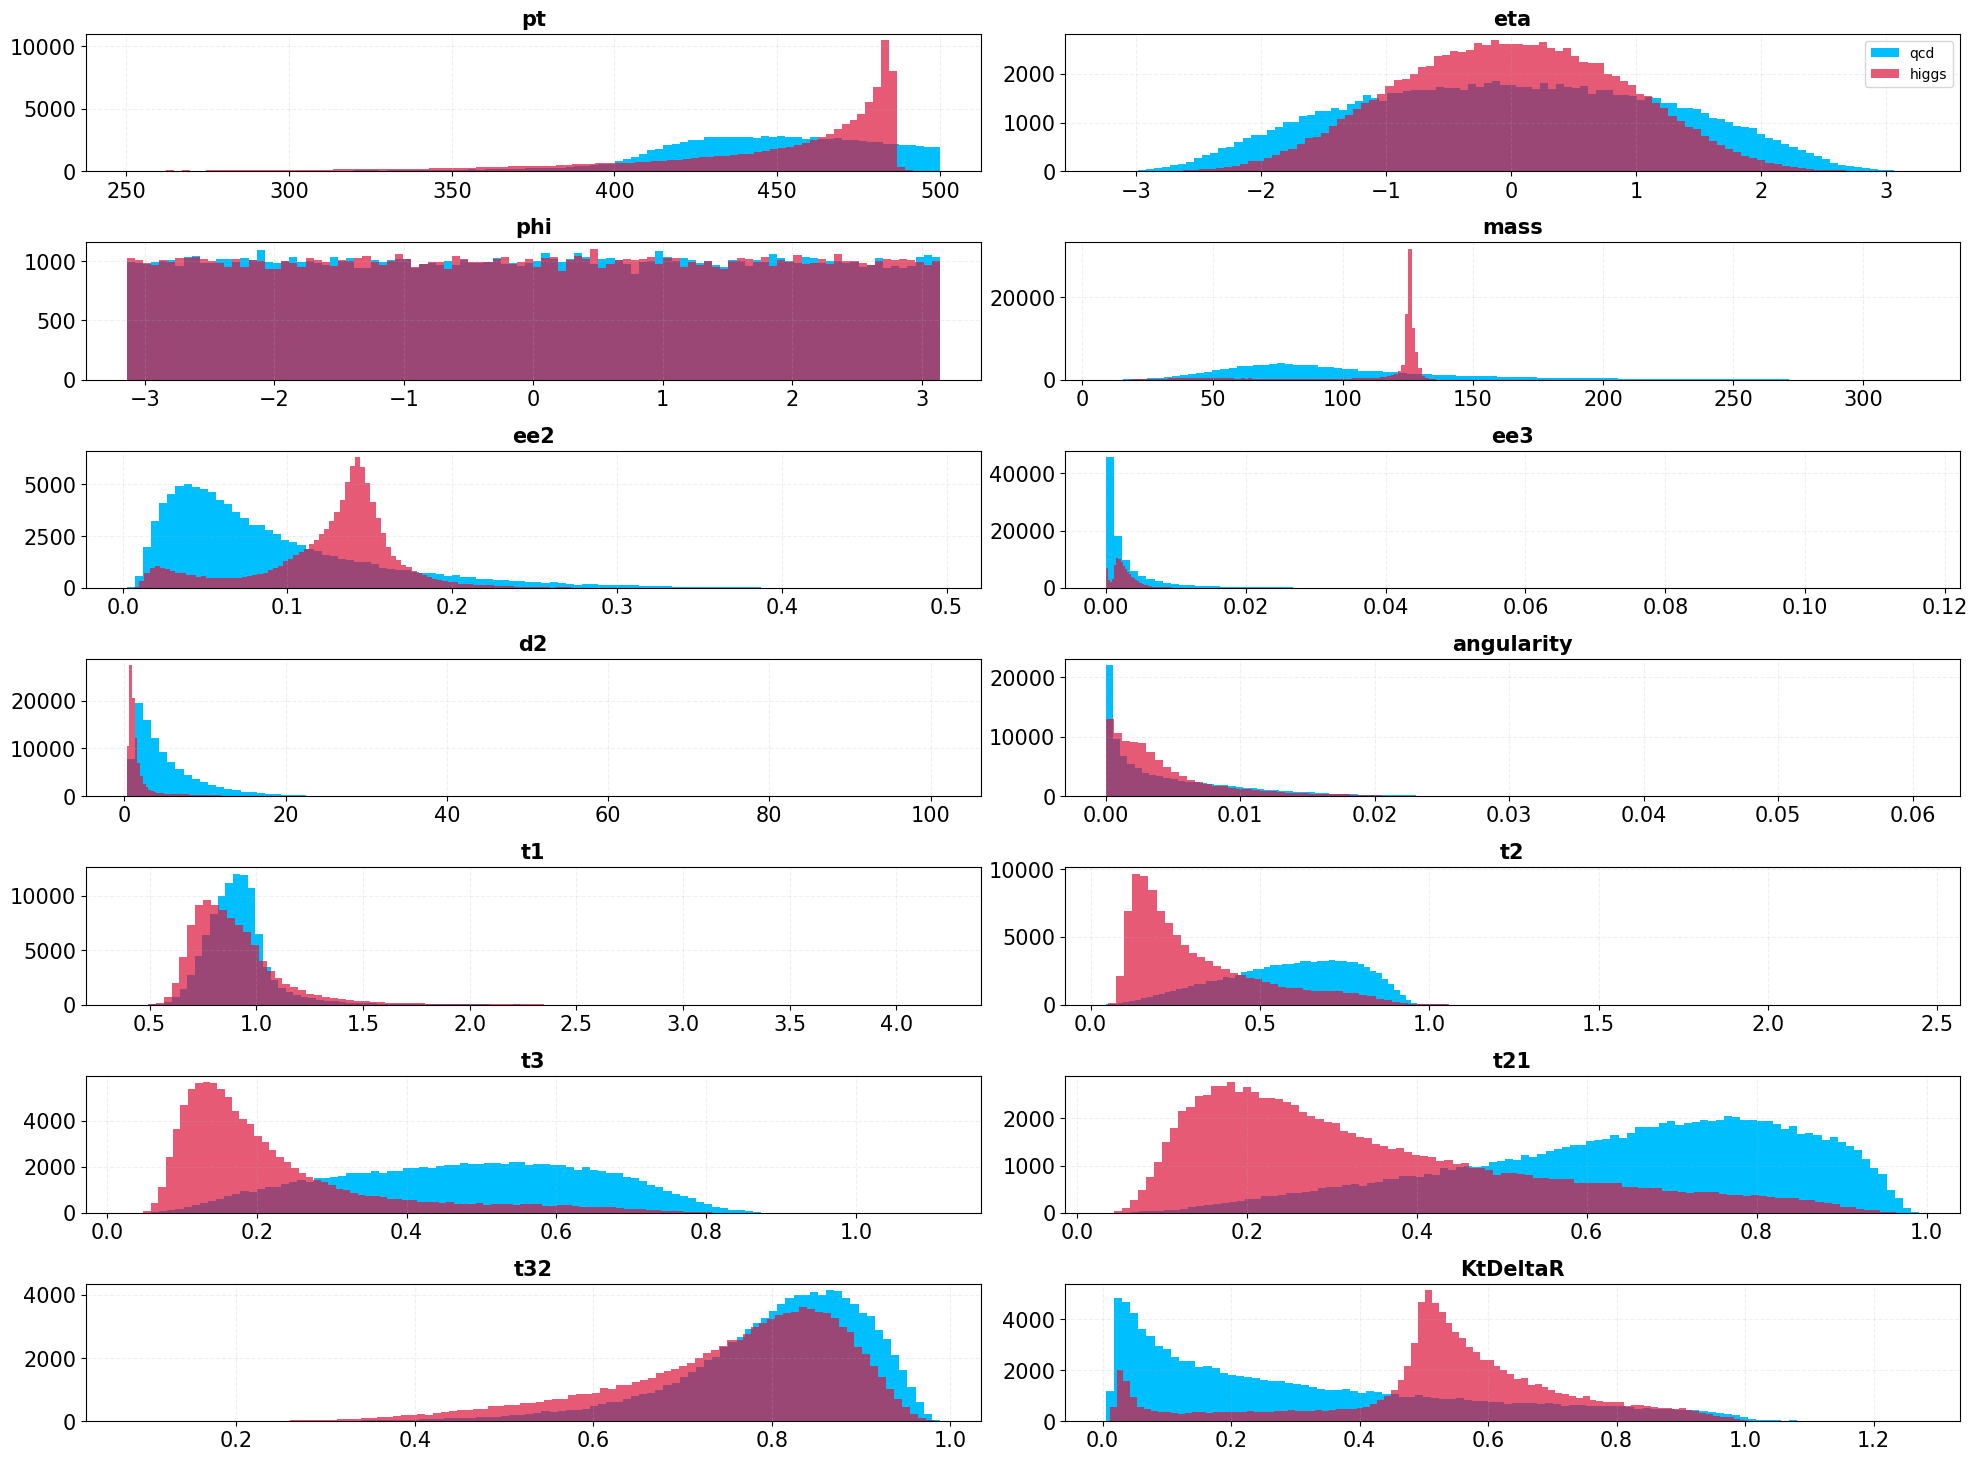

In [7]:
fig, ax = plt.subplots(7, 2)
fig.tight_layout(pad=3.0)

for i in range(0,qcd.columns.size):
    name = qcd.columns[i]
    X1 = qcd[f'{name}']
    X2 = higgs[f'{name}']
    
    bins = 100
    
    row = math.floor(i/2)
    col = i%2
    
    ax[row, col].tick_params(labelsize = 15)
    ax[row, col].tick_params(labelsize = 15)
    ax[row, col].hist(X1, bins, color='deepskyblue', linewidth = 3, label = 'qcd')
    ax[row, col].hist(X2, bins, color='crimson', alpha = 0.7, linewidth = 3, label='higgs')
    ax[row, col].set_title(f'{name}', fontsize = 15, fontweight='bold')
    ax[row, col].grid(linestyle='--', alpha=0.2)
ax[0, 1].legend();

- **pt** - We have already described **$p_T$** above, but as a reminder, this is the transverse momentum - the momentum perpendicular to the colliding particle beams - of the jet.

- **phi** - the azimuthal angle about the axis of the colliding beams at which the detector detects the outcoming jets. The angle is seemingly random and is fairly evenly distributed across the values $-\pi<\phi<\pi$. Adding up all the collision counts across this space should yield the number of jets which is 100,000 as previously stated (this should be true for all other frames plotted above).

- **'eta'** - is described as the _pseudorapidity_ which is related to and depends on _theta_ - the angle of the jet relative to the colliding beams. Thus, since the space in _eta_ spans from negative infinity to infinity it makes sense that the distribution is a Gaussian centered on zero, as this will be the most probably value of _eta_. An _eta_ of 0 corresponds to a jet with a completely perpendicular angle from the colliding beams (90 degrees) while an _eta_ of specifically 1 and -1 corresponds to an angle of 40 and 130 degrees relative to the beam. Hence, _eta_ of $\infty$ and $-\infty$ corresponds to jets parallel and antiparallel respectively to the beam. Hence, $-\infty < \eta < \infty$ corresponds to $-\pi < \theta < \pi$.

- **angularity** - a family of infrared-safe quantities that have characteristic distributions for two-body decays

 - **mass** - given in GeV and the most probable Higgs mass is stated as 125 GeV. This will of course have some uncertainty which is reflected in the Higgs dataset's mass data. The mass of the quantum chromodynamics (QCD) background particles are more spread out as the biproducts of pp-collisions can result in a variety of particles with different masses. The mass is reconstructed from the muon-corrected combined mass of the jet.

- **ee2 and ee3** - correspond to the energy correlation functions (the i-th energy correlation function; $i=2,3$) which are based on the energies and pair-wise angles of particles within a jet

- **d2** - is a function of the energy correlation functions $ECF_3 ·(\frac{ECF_1}{ECF_2})^3$. Thus, _d2_ is related to the parameters _ee2_ and _ee3_.

- **t1**, **t2**, **t3**, **t21** and **t32** - these are the $\tau$-parameters which gives the n-subjettiness of the jet. N-subjettiness sums the angular distances of jet constituents to their nearest subjet axis

- **KtDeltaR** - $\Delta R$ of two subjets within the large-$R$ jet. This corresponds to the minimal relative transverse momentum between particles.

For more information on the jet parameters, see p. 17 in this paper https://arxiv.org/pdf/1906.11005v2.pdf.

## Problem 1

In [8]:
plt.rcParams["figure.figsize"] = (12,7)

In [9]:
N_Higgs = 100
N_QCD = 20_000
N_data = 100_000

w_QCD = N_QCD/N_data
w_Higgs = N_Higgs/N_data

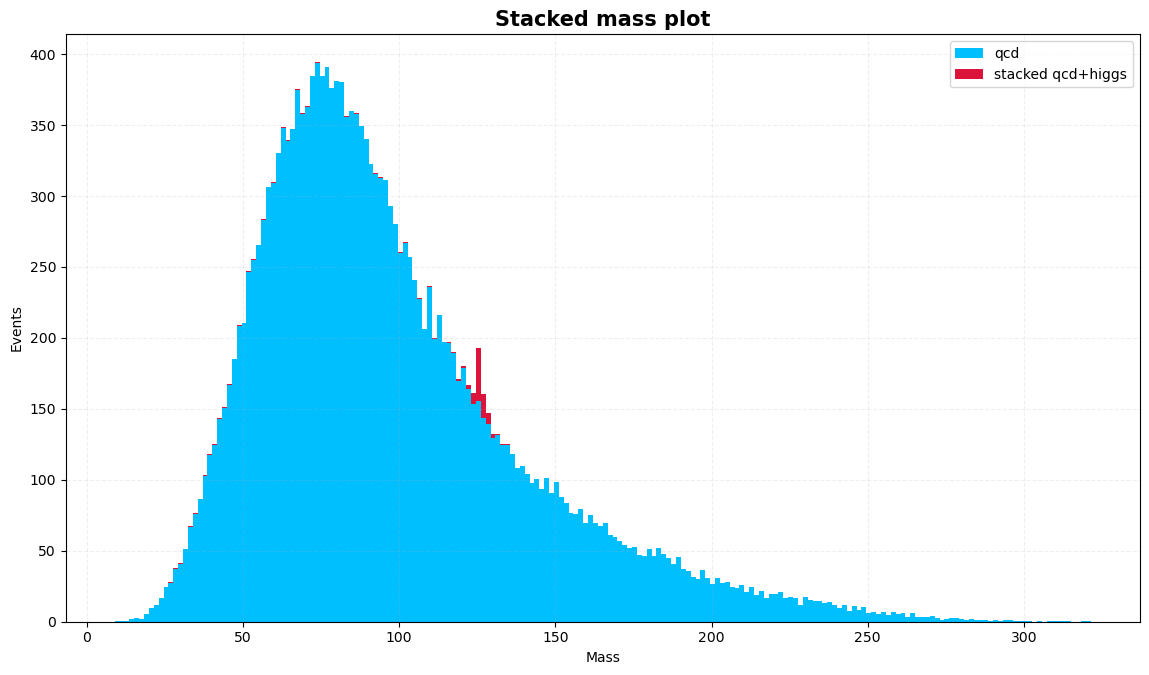

In [10]:
fig, ax = plt.subplots(1, 1)
fig.tight_layout(pad=3.0)

X1 = qcd['mass']
X2 = higgs['mass']

bins = 200

w1 = np.ones(X1.size)*w_QCD
w2 = np.ones(X2.size)*w_Higgs

ax.hist([X1, X2], bins, stacked=True, color=['deepskyblue', 'crimson'], weights=[w1, w2], linewidth = 3, label = ['qcd', 'stacked qcd+higgs'])
ax.set_xlabel('Mass')
ax.set_ylabel('Events')
ax.set_title('Stacked mass plot', fontsize = 15, fontweight='bold')
ax.grid(linestyle='--', alpha=0.2)
ax.legend();

In [11]:
bkgd1 = stats.poisson(mu=N_QCD)
significance1 = bkgd1.sf(N_QCD+N_Higgs)
significance1

0.23847212190687442

In [12]:
# Shorthand
approx_significance1 = N_Higgs/(N_QCD)**(1/2)
approx_significance1

0.7071067811865475

The _shorthand_ way of estimating the significance of the detection (of 100 Higgs vs. 20000 QCD events) gives a quick way to infer the signal-to-noise ratio of the experiment. The higher number of signal events and the lower number of signal events, the more significant the event is.

The shorthand method yields a higher significance (higher value) than using Poisson statistics (which yields a lower significance, lower value). Since our significance for either method is this low, we will need to make cuts in the N_QCD and as few cuts in the N_Higgs as possible in order to increase our significance.

## Problem 2

In order to increase the significance of our Higgs events, we will make cuts in the data.

We want to make cuts in the below qcd such as to exclude as much background without excluding much of the higgs distribution. Then, our significance $\frac{N_{Higgs}}{\sqrt{N_{QCD}}}$ will increase.

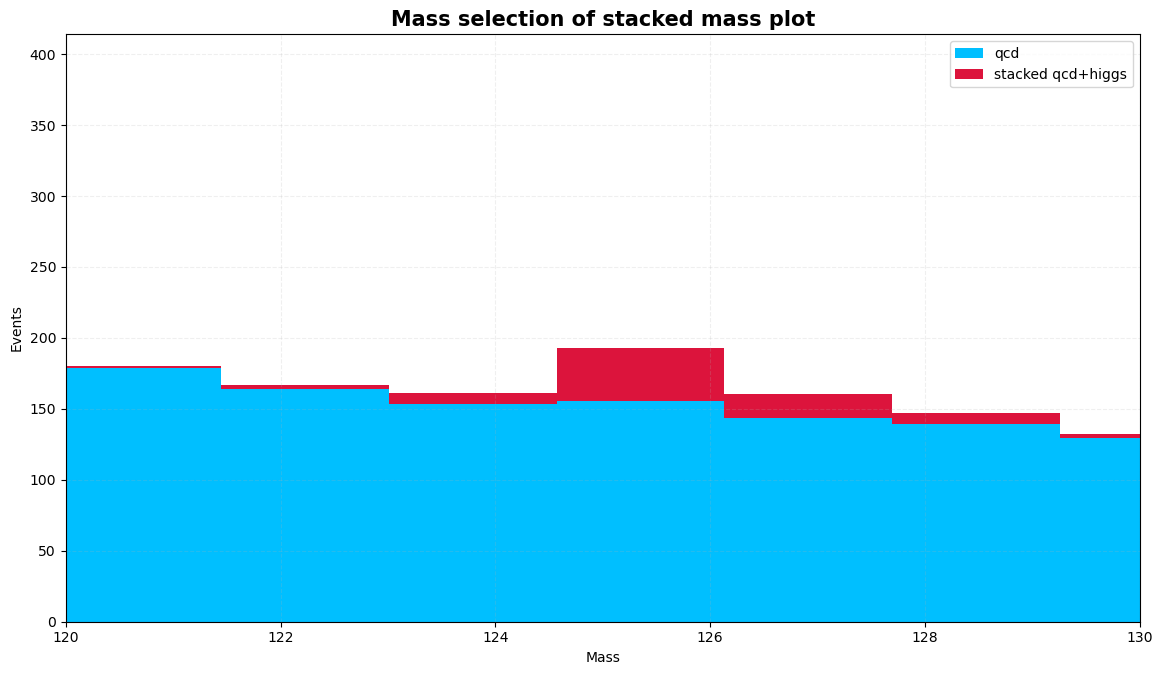

In [13]:
N_Higgs = 100
N_QCD = 20000

fig, ax = plt.subplots(1, 1)
fig.tight_layout(pad=3.0)

X1 = qcd['mass']
X2 = higgs['mass']

bins = 200

w1 = np.ones(X1.size)*w_QCD
w2 = np.ones(X2.size)*w_Higgs

ax.hist([X1, X2], bins, stacked=True, color=['deepskyblue', 'crimson'], weights=[w1, w2], linewidth = 3, label = ['qcd', 'stacked qcd+higgs'])
ax.set_xlabel('Mass')
ax.set_ylabel('Events')
ax.set_title('Mass selection of stacked mass plot', fontsize = 15, fontweight='bold')
ax.grid(linestyle='--', alpha=0.2)
ax.set_xlim([120, 130])
ax.legend();

In [14]:
# Making cuts in background data
mask1 = qcd['mass'] > 120
mask2 = qcd['mass'] < 400
cut = qcd[mask1]
cut1 = cut[mask2]

<ipython-input-14-e3524d47f58e>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cut1 = cut[mask2]


In [15]:
cut1

,pt,eta,phi,mass,ee2,ee3,d2,angularity,t1,t2,t3,t21,t32,KtDeltaR
0,489.631389,1.955969,1.803007,125.298720,0.099409,0.003247,3.304886,0.000528,0.846096,0.586658,0.439468,0.693370,0.749105,0.333731
20,415.076589,-1.506753,1.907424,129.731372,0.144225,0.005892,1.964075,0.000722,0.749090,0.394665,0.368057,0.526859,0.932580,0.720351
26,452.954752,-2.113726,-0.656256,140.604098,0.145026,0.005989,1.963491,0.000306,0.910954,0.458554,0.362265,0.503378,0.790015,0.598624
29,389.628555,2.307074,2.140521,193.213930,0.280462,0.024363,1.104346,0.000280,1.465348,0.245479,0.157898,0.167523,0.643226,0.786797
32,458.823291,-0.952371,-0.452309,136.732974,0.148186,0.007501,2.305226,0.004092,0.942433,0.699523,0.612565,0.742252,0.875689,0.212681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99979,489.045184,-1.047401,1.918182,136.531828,0.138522,0.005242,1.972036,0.002335,1.284882,0.670594,0.384743,0.521911,0.573735,0.286969
99981,459.074215,0.364665,-1.763238,245.666241,0.335468,0.025205,0.667634,0.019321,0.909263,0.246286,0.163337,0.270863,0.663202,0.983290
99988,460.350538,0.572863,-2.222752,147.251130,0.134181,0.005520,2.284693,0.016441,0.910971,0.537477,0.360971,0.590004,0.671602,0.817680
99990,489.957763,0.547008,-2.709347,183.394738,0.156273,0.009033,2.366984,0.022600,0.873900,0.456772,0.364739,0.522682,0.798515,0.837876


Each cut gives us a dataframe that contains a selection of events/jets with masses within the value of our mass cut.

In [16]:
mask1 = qcd['mass'] > 120
mask2 = qcd['mass'] < 150
cut = qcd[mask1]
cut2 = cut[mask2]

mask1 = qcd['mass'] > 120
mask2 = qcd['mass'] < 128
cut = qcd[mask1]
cut3 = cut[mask2]

mask1 = qcd['mass'] > 122
mask2 = qcd['mass'] < 128
cut = qcd[mask1]
cut4 = cut[mask2]

<ipython-input-16-f7ca04484aa5>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cut2 = cut[mask2]
<ipython-input-16-f7ca04484aa5>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cut3 = cut[mask2]
<ipython-input-16-f7ca04484aa5>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cut4 = cut[mask2]


In [17]:
cuts = [cut1, cut2, cut3, cut4]

In [18]:
mask1 = higgs['mass'] > 120
mask2 = higgs['mass'] < 400
cut = higgs[mask1]
cuthiggs1 = cut[mask2]

mask1 = higgs['mass'] > 120
mask2 = higgs['mass'] < 150
cut = higgs[mask1]
cuthiggs2 = cut[mask2]

mask1 = higgs['mass'] > 120
mask2 = higgs['mass'] < 128
cut = higgs[mask1]
cuthiggs3 = cut[mask2]

mask1 = higgs['mass'] > 122
mask2 = higgs['mass'] < 128
cut = higgs[mask1]
cuthiggs4 = cut[mask2]

<ipython-input-18-b9098ae1c111>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cuthiggs1 = cut[mask2]
<ipython-input-18-b9098ae1c111>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cuthiggs2 = cut[mask2]
<ipython-input-18-b9098ae1c111>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cuthiggs3 = cut[mask2]
<ipython-input-18-b9098ae1c111>:19: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cuthiggs4 = cut[mask2]


In [19]:
cuts_higgs = [cuthiggs1, cuthiggs2, cuthiggs3, cuthiggs4]

The first cut cuts the data down like this:

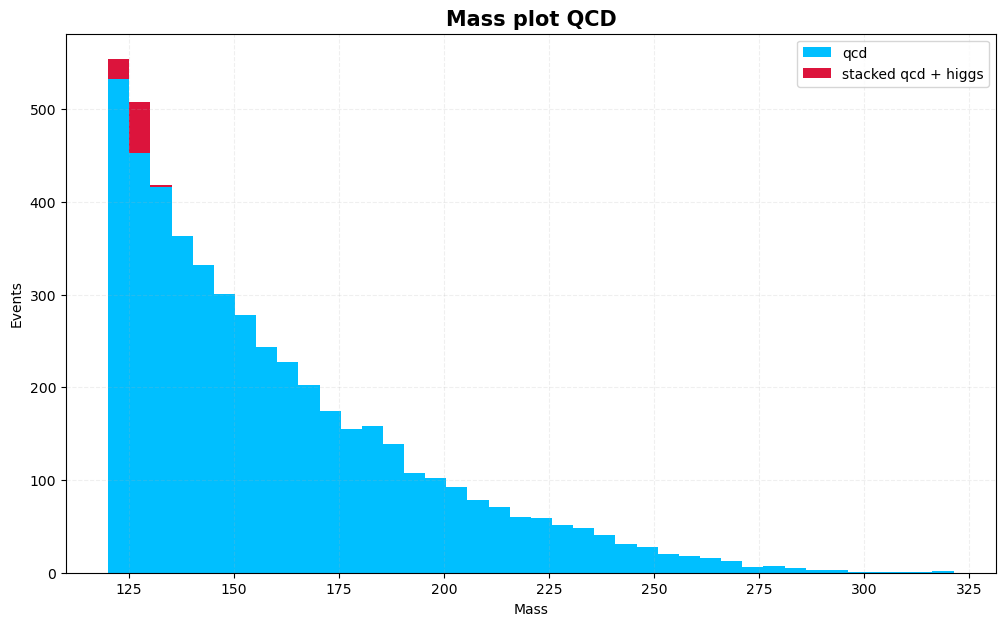

In [20]:
bins = 100

X1 = cuts[0]['mass']
X2 = cuts_higgs[0]['mass']

w1 = np.ones(X1.size)*w_QCD
w2 = np.ones(X2.size)*w_Higgs

n1, temp1, temp2 = plt.hist([X1,X2], stacked=True, bins = 40, weights=[w1,w2], color=['deepskyblue','crimson'], label = ['qcd', 'stacked qcd + higgs'])
plt.xlabel('Mass')
plt.ylabel('Events')
plt.title('Mass plot QCD', fontsize = 15, fontweight='bold')
plt.grid(linestyle='--', alpha=0.2)
plt.legend();

Text(0.5, 1.0, 'Mass selection of stacked mass plot')

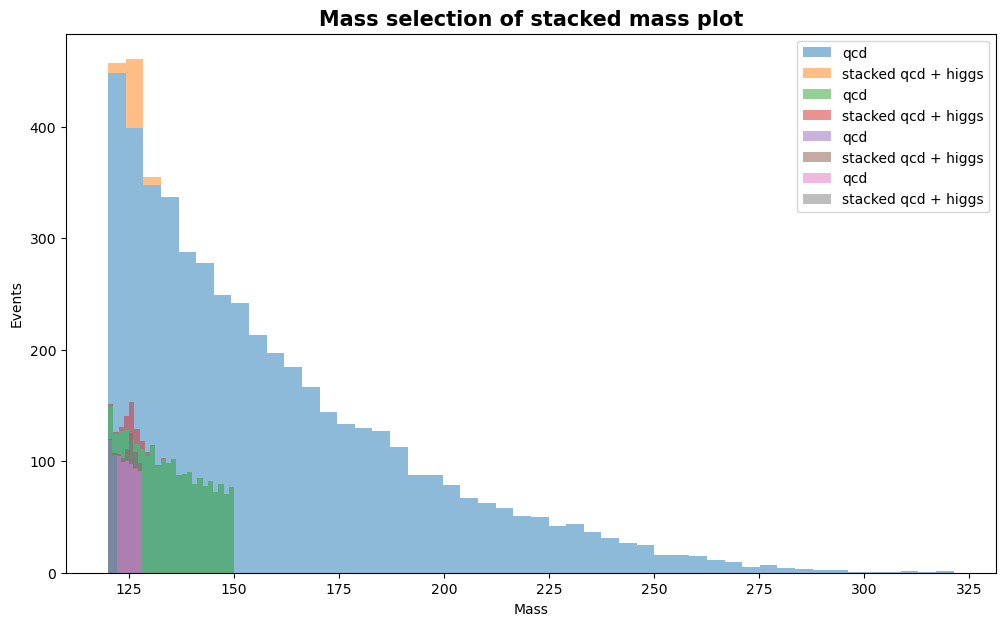

In [61]:
nqcd = []
nhiggs = []

for index in range(0, len(cuts)):
    
    X1 = cuts[index]['mass']
    X2 = cuts_higgs[index]['mass']
    
    w1 = np.ones(X1.size)*w_QCD
    w2 = np.ones(X2.size)*w_Higgs

    narray, temp1, temp2 = plt.hist([X1,X2], stacked=True, bins=round(X1.size/500), weights=[w1, w2], label=['qcd', 'stacked qcd + higgs'], alpha=0.5)
    plt.grid(linestyle='--', alpha=0.2)
    plt.legend();
    
    nqcd.append(narray[0])
    nhiggs.append(narray[1])
plt.xlabel('Mass')
plt.ylabel('Events')
plt.title('Mass selection of stacked mass plot', fontsize = 15, fontweight='bold')

In [62]:
Nqcd = []
for i in range(0, len(nqcd)):
    Nqcd.append(np.sum(nqcd[i]))
    
Nhiggs = []
for i in range(0, len(nhiggs)):
    Nhiggs.append(np.sum(nhiggs[i]))

In [63]:
approx_significance = []
for i in range(0, len(Nqcd)):
    sig = N_Higgs/(Nqcd[i])**(1/2)
    approx_significance.append(sig)

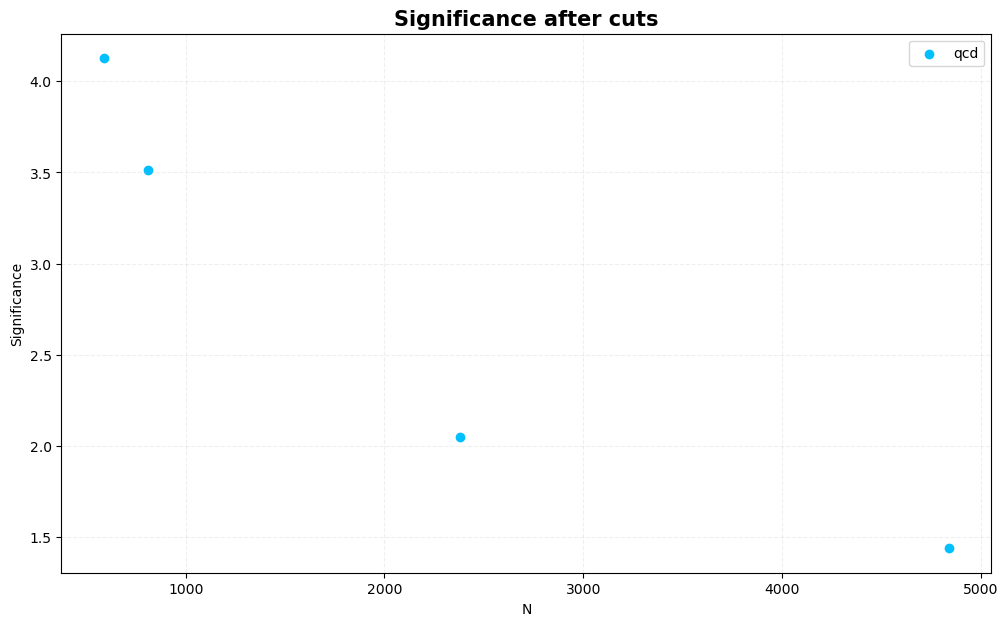

In [64]:
plt.scatter(Nqcd, approx_significance, color='deepskyblue', label = 'qcd')
plt.xlabel('N')
plt.ylabel('Significance')
plt.title('Significance after cuts', fontsize = 15, fontweight='bold')
plt.grid(linestyle='--', alpha=0.2)
plt.legend();

We see that making cuts that rejects more of the background without rejecting Higgs data yields higher significances, and this relationship seems to follow an exponential curve.

Our cuts are thus between 122 and 128 $\frac{GeV}{c^2}$

## Problem 3

We now make two sets of _stacked_ histograms: Set 1 without mass cuts and Set 2 with our chosen mass cuts.

We will then attempt to identify another feature that can be discriminative and help increase our significance. 

### Set 1

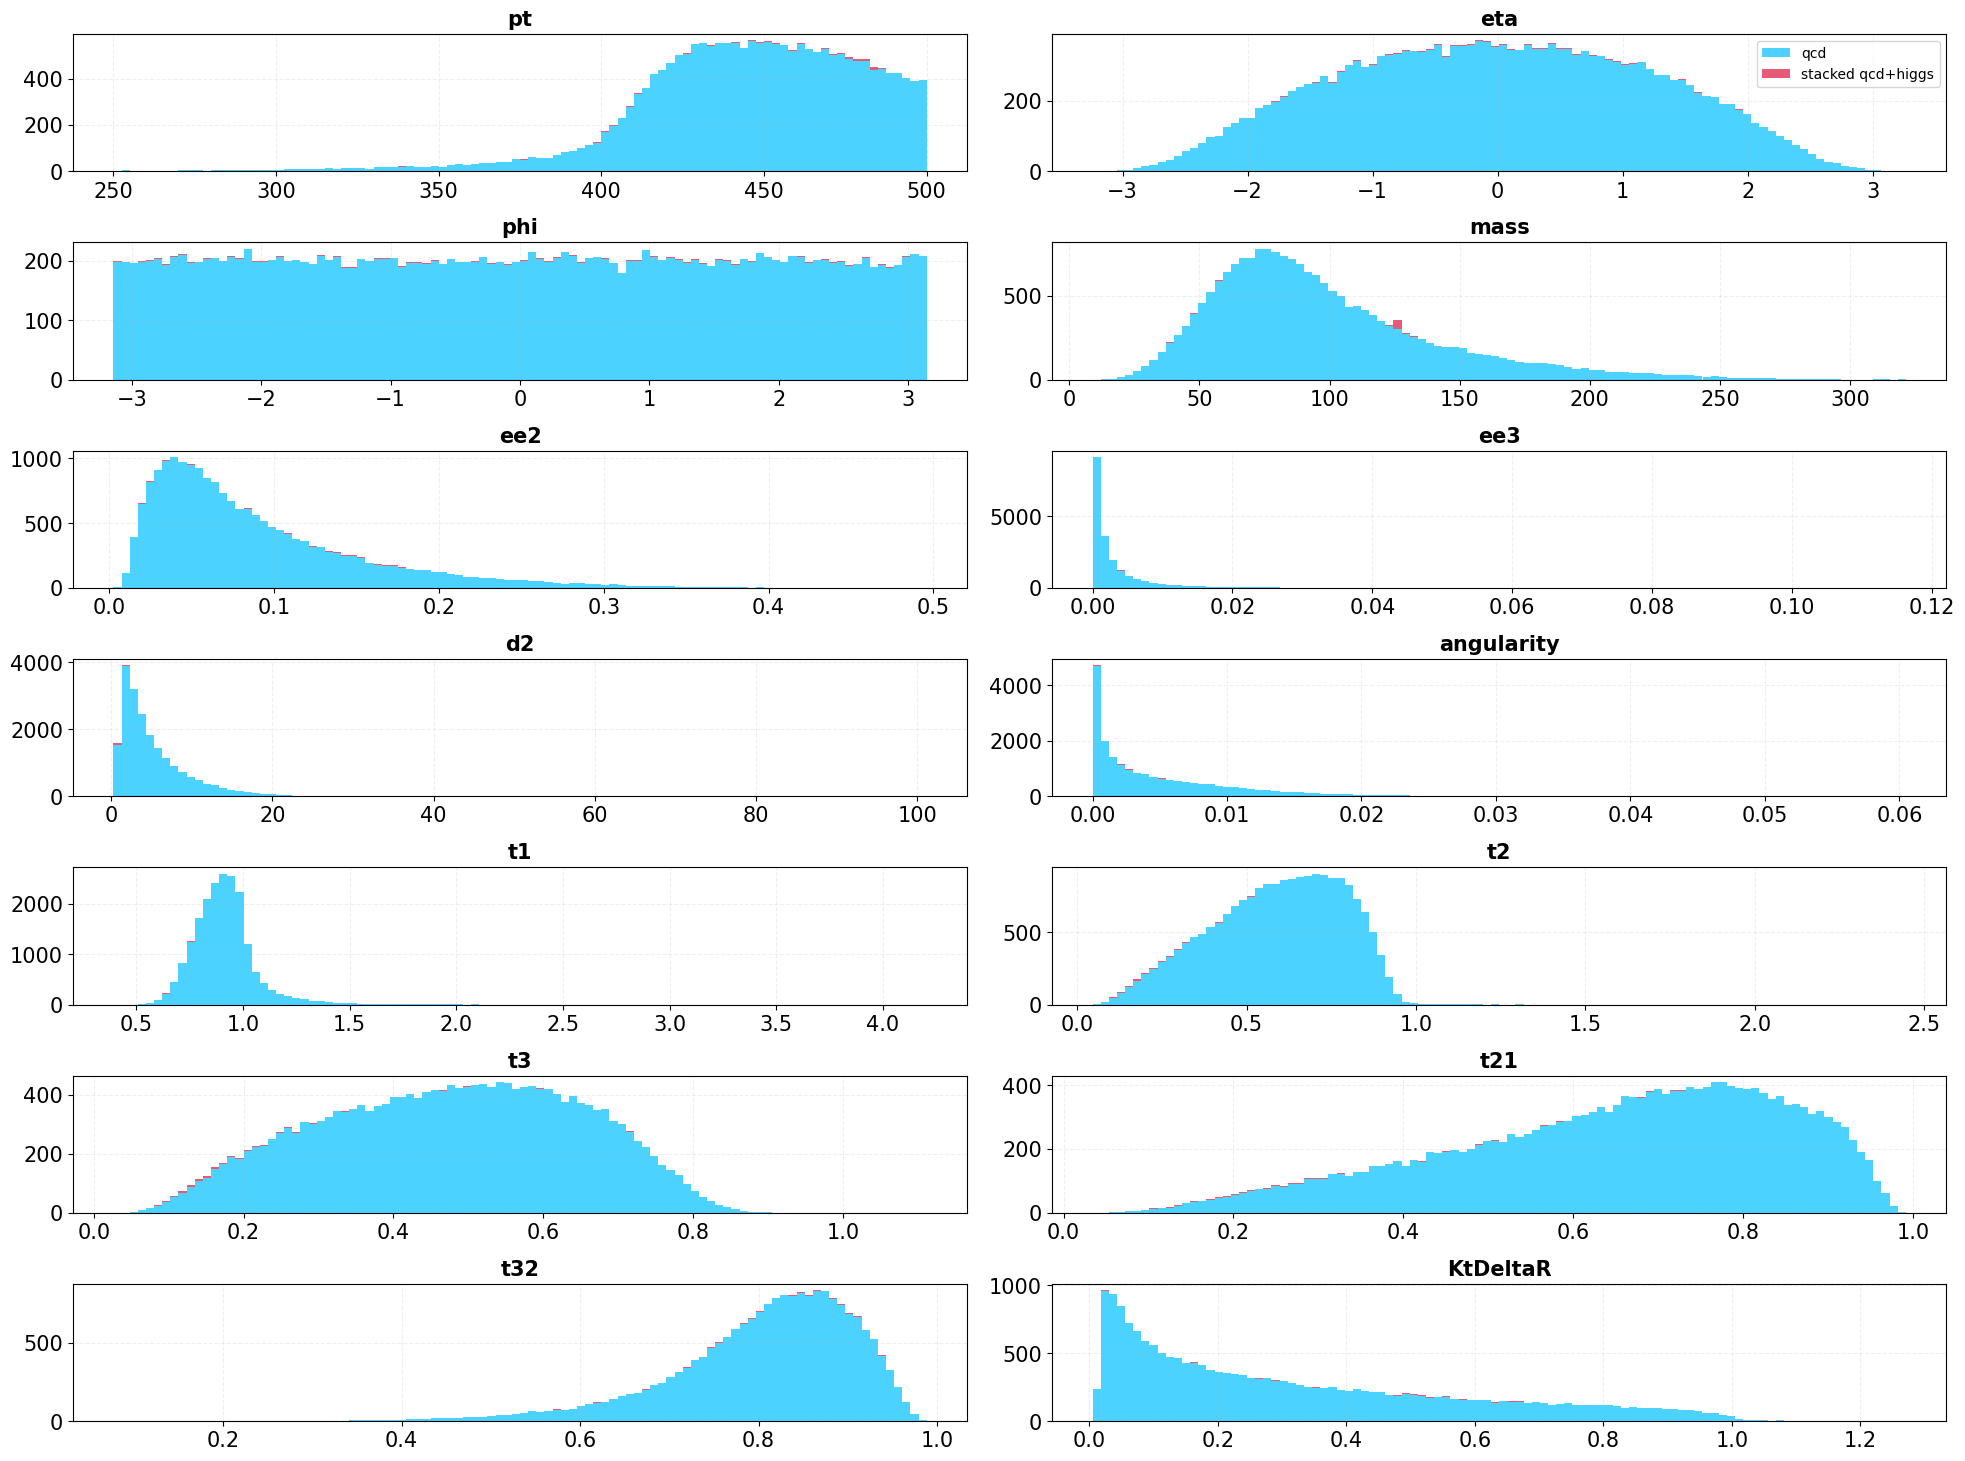

In [65]:
plt.rcParams["figure.figsize"] = (20,15)

fig, ax = plt.subplots(7, 2)
fig.tight_layout(pad=3.0)

for i in range(0,qcd.columns.size):
    name = qcd.columns[i]
    X1 = qcd[f'{name}']
    X2 = higgs[f'{name}']
    
    w1 = np.ones(X1.size)*w_QCD
    w2 = np.ones(X2.size)*w_Higgs
    
    bins = 100
    
    row = math.floor(i/2)
    col = i%2
    
    ax[row, col].tick_params(labelsize = 15)
    ax[row, col].tick_params(labelsize = 15)
    ax[row, col].hist([X1, X2], bins, stacked=True, color=['deepskyblue', 'crimson'], alpha=0.7, weights=[w1, w2], linewidth = 3, label = ['qcd', 'stacked qcd+higgs'])
    ax[row, col].set_title(f'{name}', fontsize = 15, fontweight='bold')
    ax[row, col].grid(linestyle='--', alpha=0.2)
ax[0, 1].legend();

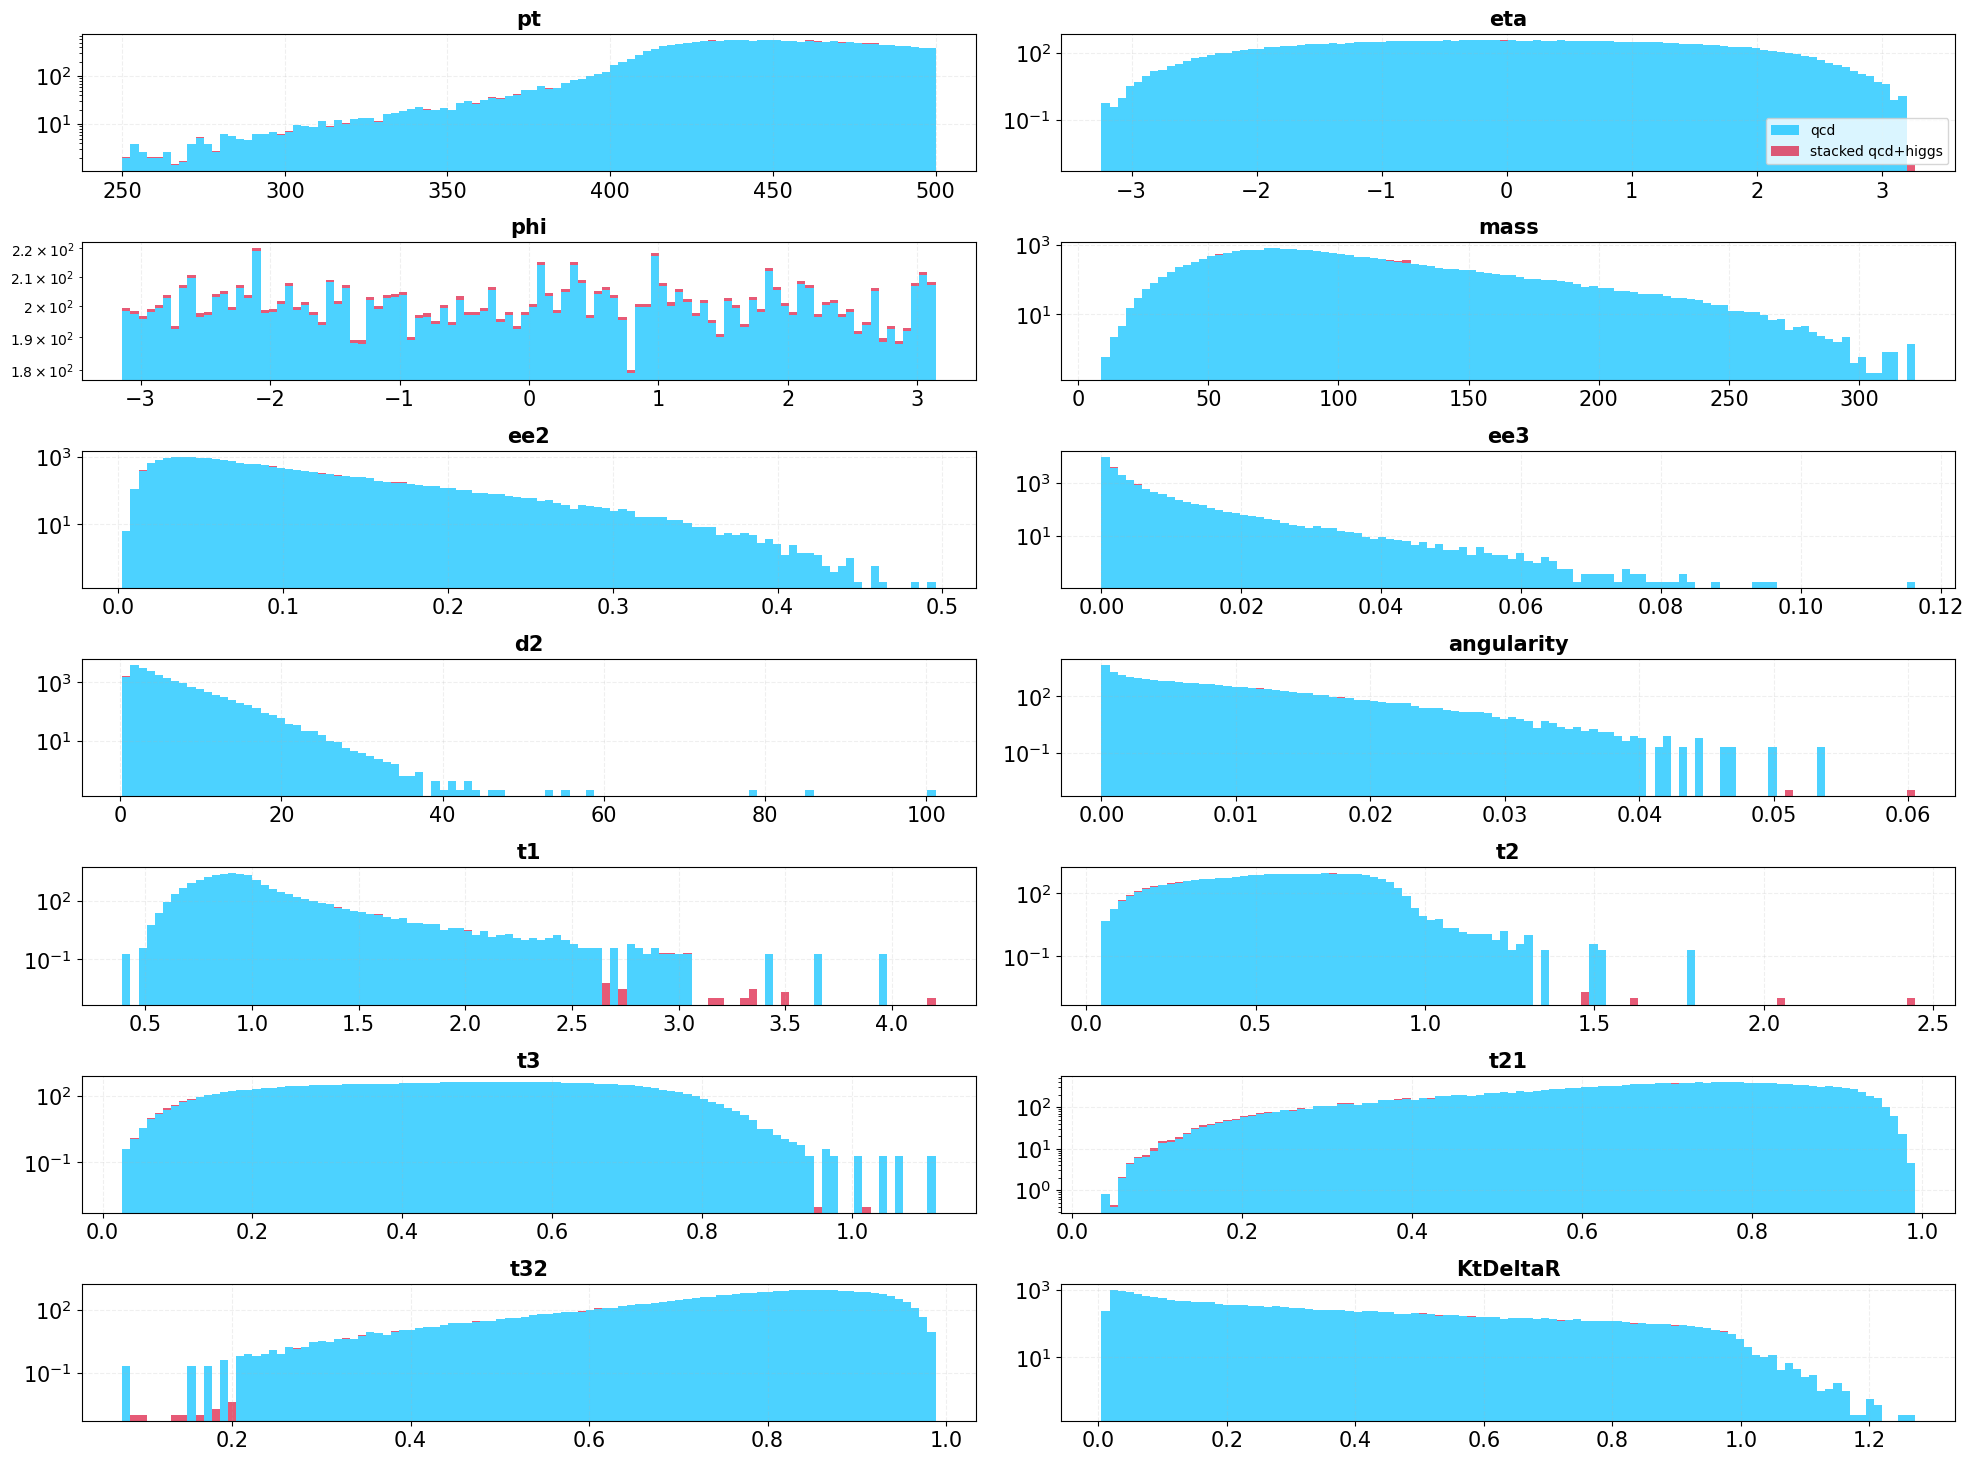

In [66]:
fig, ax = plt.subplots(7, 2)
fig.tight_layout(pad=3.0)

for i in range(0,qcd.columns.size):
    name = qcd.columns[i]
    X1 = qcd[f'{name}']
    X2 = higgs[f'{name}']
    
    w1 = np.ones(X1.size)*w_QCD
    w2 = np.ones(X2.size)*w_Higgs
    
    bins = 100
    
    row = math.floor(i/2)
    col = i%2
    
    ax[row, col].tick_params(labelsize = 15)
    ax[row, col].tick_params(labelsize = 15)
    ax[row, col].hist([X1, X2], bins, stacked=True, color=['deepskyblue', 'crimson'], alpha=0.7, weights=[w1, w2], linewidth = 3, label = ['qcd', 'stacked qcd+higgs'])
    ax[row, col].set_title(f'{name}', fontsize = 15, fontweight='bold')
    ax[row, col].grid(linestyle='--', alpha=0.2)
    ax[row, col].set_yscale('log')
ax[0, 1].legend();

We can clearly make cuts in eta, ee2, ee3, d2, t2 and t21.

### Set 2

We apply our optimal mass cut to create Set 2:

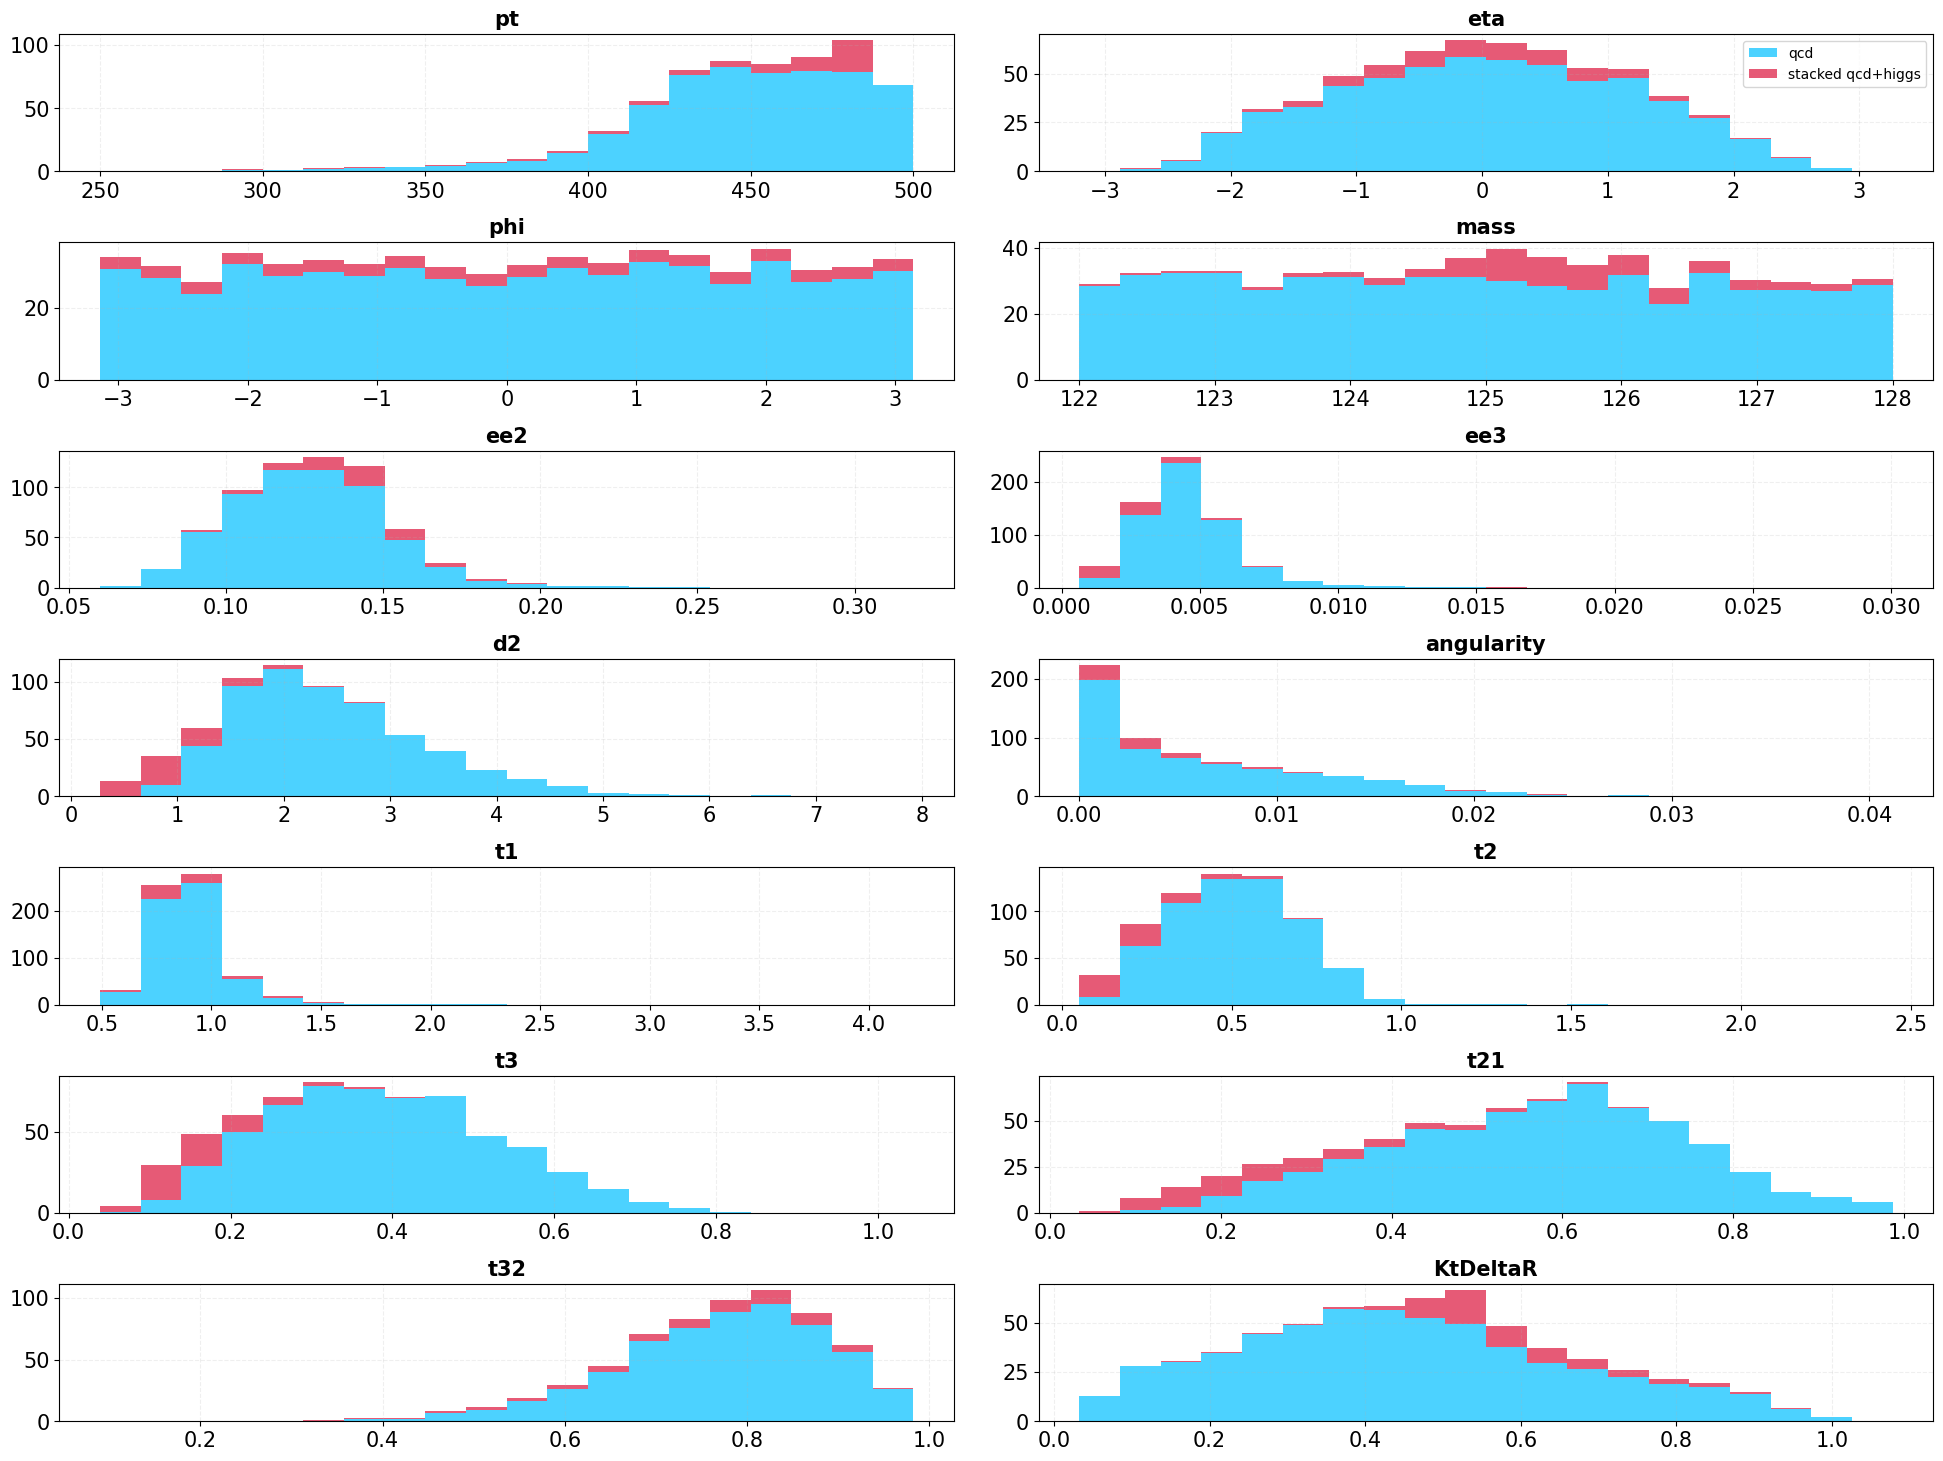

In [67]:
plt.rcParams["figure.figsize"] = (20,15)

fig, ax = plt.subplots(7, 2)
fig.tight_layout(pad=3.0)

for i in range(0,qcd.columns.size):
    
    name = qcd.columns[i]
    X1 = cuts[3][f'{name}']
    X2 = cuts_higgs[3][f'{name}']
    
    w1 = np.ones(X1.size)*w_QCD
    w2 = np.ones(X2.size)*w_Higgs
    
    bins = 20
    
    row = math.floor(i/2)
    col = i%2
    
    ax[row, col].tick_params(labelsize = 15)
    ax[row, col].tick_params(labelsize = 15)
    ax[row, col].hist([X1, X2], bins, stacked=True, color=['deepskyblue', 'crimson'], alpha=0.7, weights=[w1, w2], linewidth = 3, label = ['qcd', 'stacked qcd+higgs'])
    ax[row, col].set_title(f'{name}', fontsize = 15, fontweight='bold')
    ax[row, col].grid(linestyle='--', alpha=0.2)
ax[0, 1].legend();

<ipython-input-68-2eadd820120f>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cut4 = cut[mask2]
<ipython-input-68-2eadd820120f>:14: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  cut4higgs = cut[mask2]


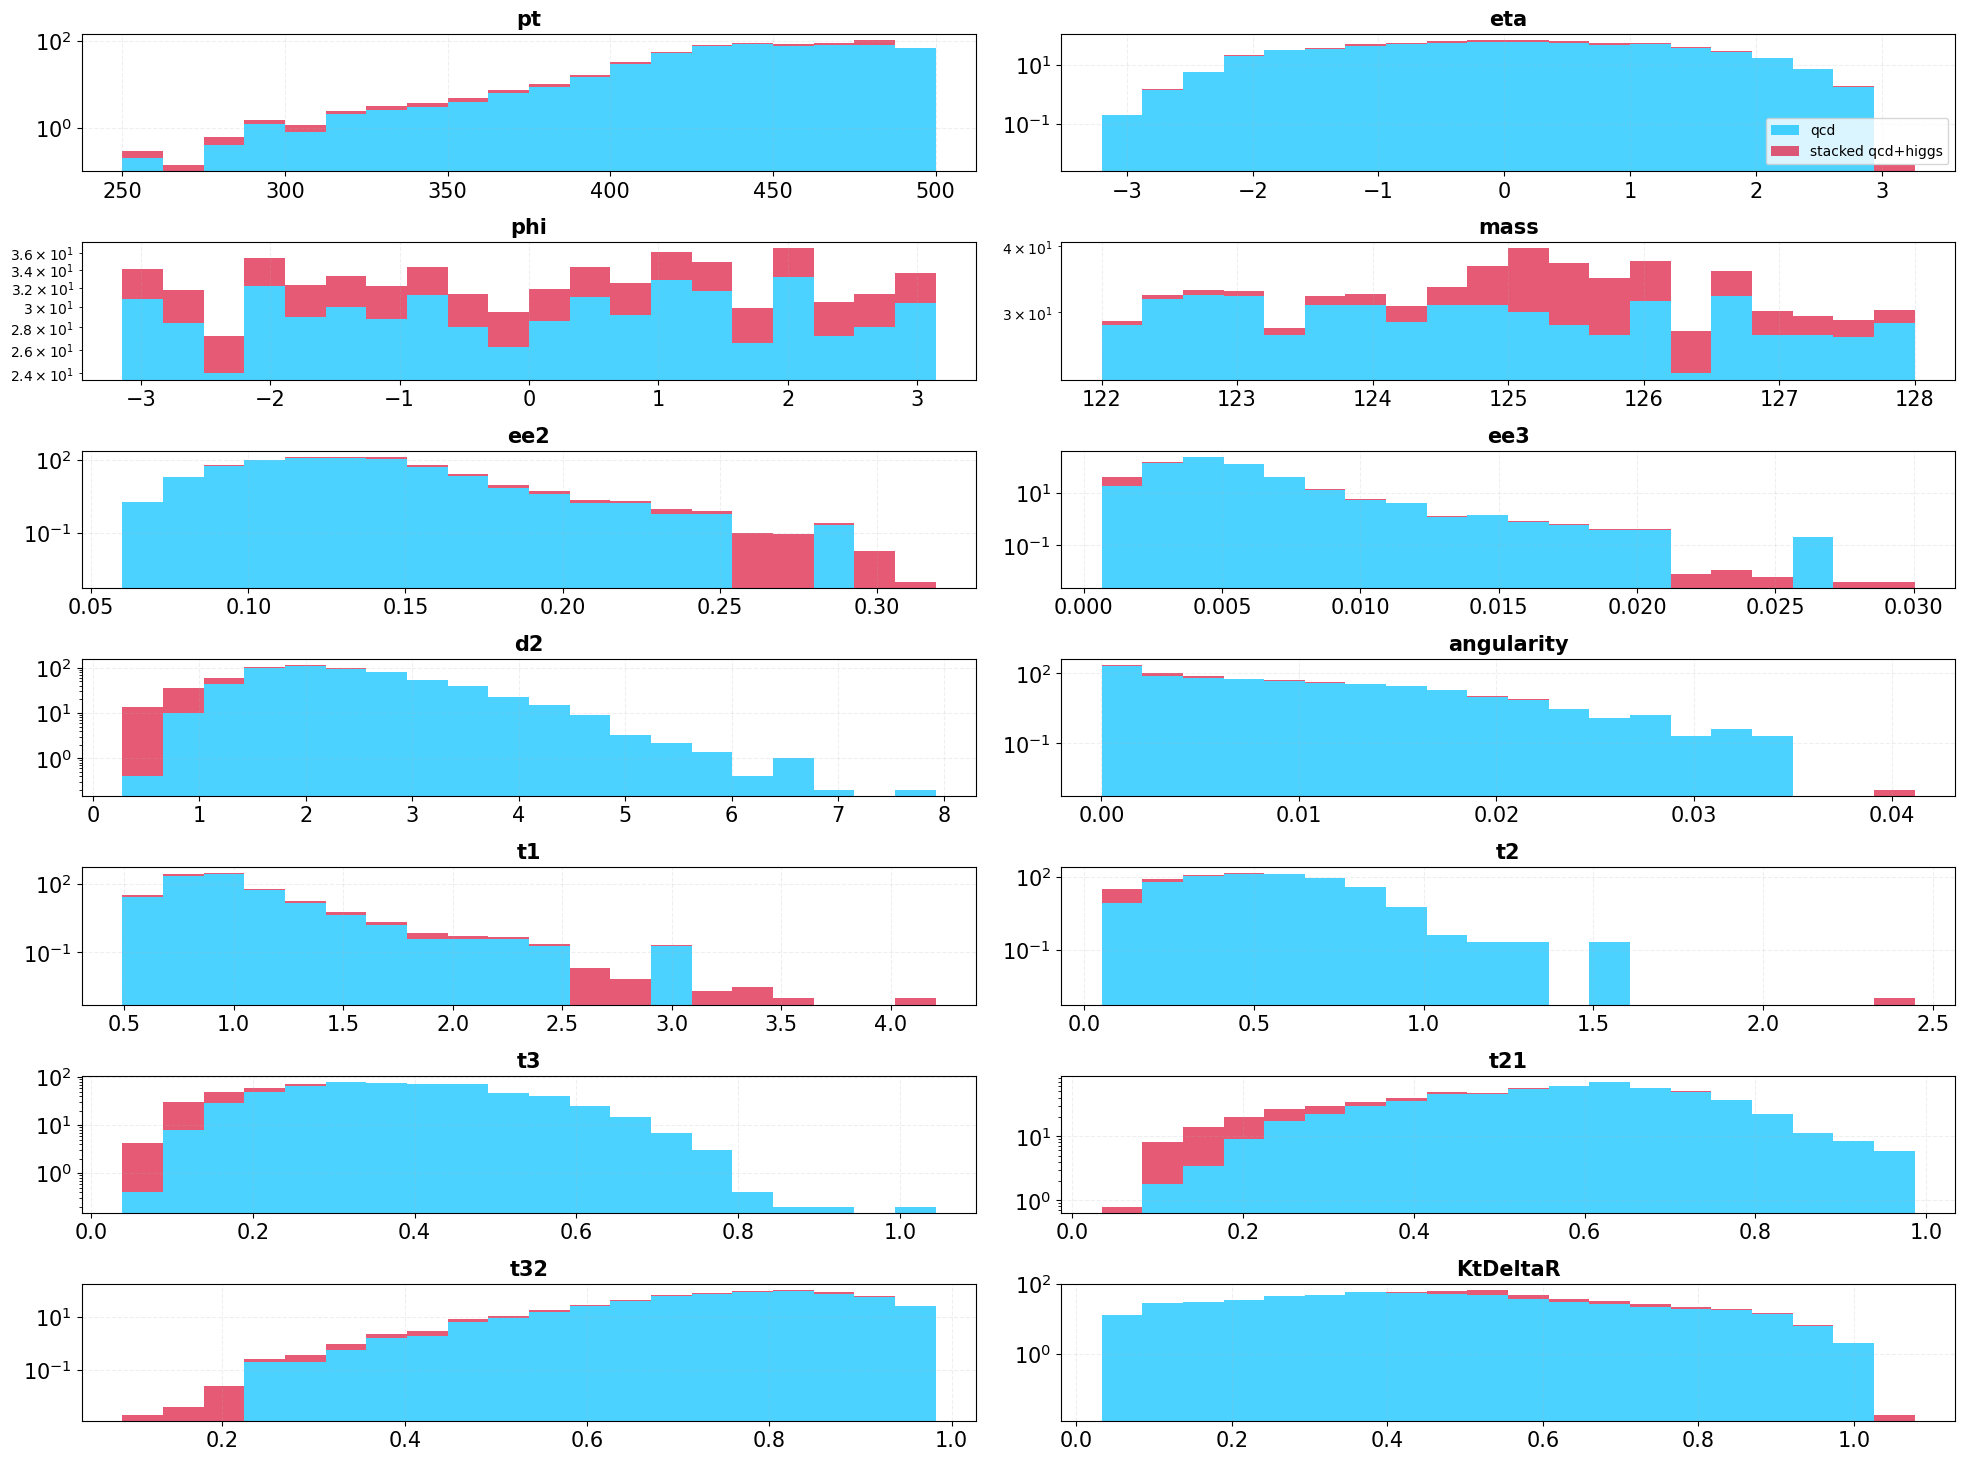

In [68]:
plt.rcParams["figure.figsize"] = (20,15)

fig, ax = plt.subplots(7, 2)
fig.tight_layout(pad=3.0)

mask1 = qcd['mass'] > 122
mask2 = qcd['mass'] < 128
cut = qcd[mask1]
cut4 = cut[mask2]

mask1 = higgs['mass'] > 122
mask2 = higgs['mass'] < 128
cut = higgs[mask1]
cut4higgs = cut[mask2]

for i in range(0,qcd.columns.size):
    
    name = qcd.columns[i]
    X1 = cut4[f'{name}']
    X2 = cut4higgs[f'{name}']
    
    w1 = np.ones(X1.size)*w_QCD
    w2 = np.ones(X2.size)*w_Higgs
    
    bins = 20
    
    row = math.floor(i/2)
    col = i%2
    
    ax[row, col].tick_params(labelsize = 15)
    ax[row, col].tick_params(labelsize = 15)
    ax[row, col].hist([X1, X2], bins, stacked=True, color=['deepskyblue', 'crimson'], alpha=0.7, weights=[w1, w2], linewidth = 3, label = ['qcd', 'stacked qcd+higgs'])
    ax[row, col].set_title(f'{name}', fontsize = 15, fontweight='bold')
    ax[row, col].grid(linestyle='--', alpha=0.2)
    ax[row, col].set_yscale('log')
ax[0, 1].legend();

## Problem 4

While we did not find any discriminative features for Set 1, there are more prevalent discriminative features present in Set 2 now that the mass cuts have been performed. From looking at the above data, we can make cuts for t3, KtDeltaR, ee2 and ee3.

In [69]:
cut4, cut4higgs

(               pt       eta       phi        mass       ee2       ee3  \
 0      489.631389  1.955969  1.803007  125.298720  0.099409  0.003247   
 84     320.287154  0.592017 -0.740326  126.608757  0.196841  0.014375   
 123    393.304233 -0.714448  3.032173  123.276979  0.134964  0.007245   
 187    470.889623 -0.840914 -2.686093  127.819027  0.120419  0.004856   
 203    443.189779  0.000071  1.750447  123.012295  0.103696  0.003209   
 ...           ...       ...       ...         ...       ...       ...   
 99861  497.352253  0.397299 -1.083313  126.713121  0.111460  0.003336   
 99869  349.704744  0.430005  2.152565  125.272633  0.165878  0.010155   
 99892  475.749348  1.762662  0.753676  124.326725  0.152276  0.004898   
 99897  424.843089  0.425303  2.417773  125.591304  0.100439  0.003527   
 99906  424.359369 -1.514124 -0.821506  123.828527  0.142509  0.005612   
 
              d2  angularity        t1        t2        t3       t21       t32  \
 0      3.304886    0.000528

In [78]:
def cut_data(data, name, lower, upper):
    mask1 = data[f'{name}'] > lower
    mask2 = data[f'{name}'] < upper
    tempcut = data[mask1]
    new_cut = tempcut[mask2]
    return new_cut

In [84]:
# Cutting down qcd
old_cut = cuts[3]

new_cut = cut_data(old_cut, 'eta', -2.0, 2.0)
new_cut = cut_data(new_cut, 'ee2', 0.0, 0.18)
new_cut = cut_data(new_cut, 'ee3', 0.00, 0.01)
new_cut = cut_data(new_cut, 'd2', 0, 5)
new_cut = cut_data(new_cut, 't2', 0.00, 0.55)
new_cut = cut_data(new_cut, 't21', 0.00, 0.75)

new_qcd = new_cut

<ipython-input-78-84bfcdc42013>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_cut = tempcut[mask2]


In [86]:
# Cutting down Higgs data
old_cut = cuts_higgs[3]

new_cut = cut_data(old_cut, 'eta', -2.0, 2.0)
new_cut = cut_data(new_cut, 'ee2', 0.0, 0.18)
new_cut = cut_data(new_cut, 'ee3', 0.00, 0.01)
new_cut = cut_data(new_cut, 'd2', 0, 5)
new_cut = cut_data(new_cut, 't2', 0.00, 0.55)
new_cut = cut_data(new_cut, 't21', 0.00, 0.75)

new_higgs = new_cut

<ipython-input-78-84bfcdc42013>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  new_cut = tempcut[mask2]


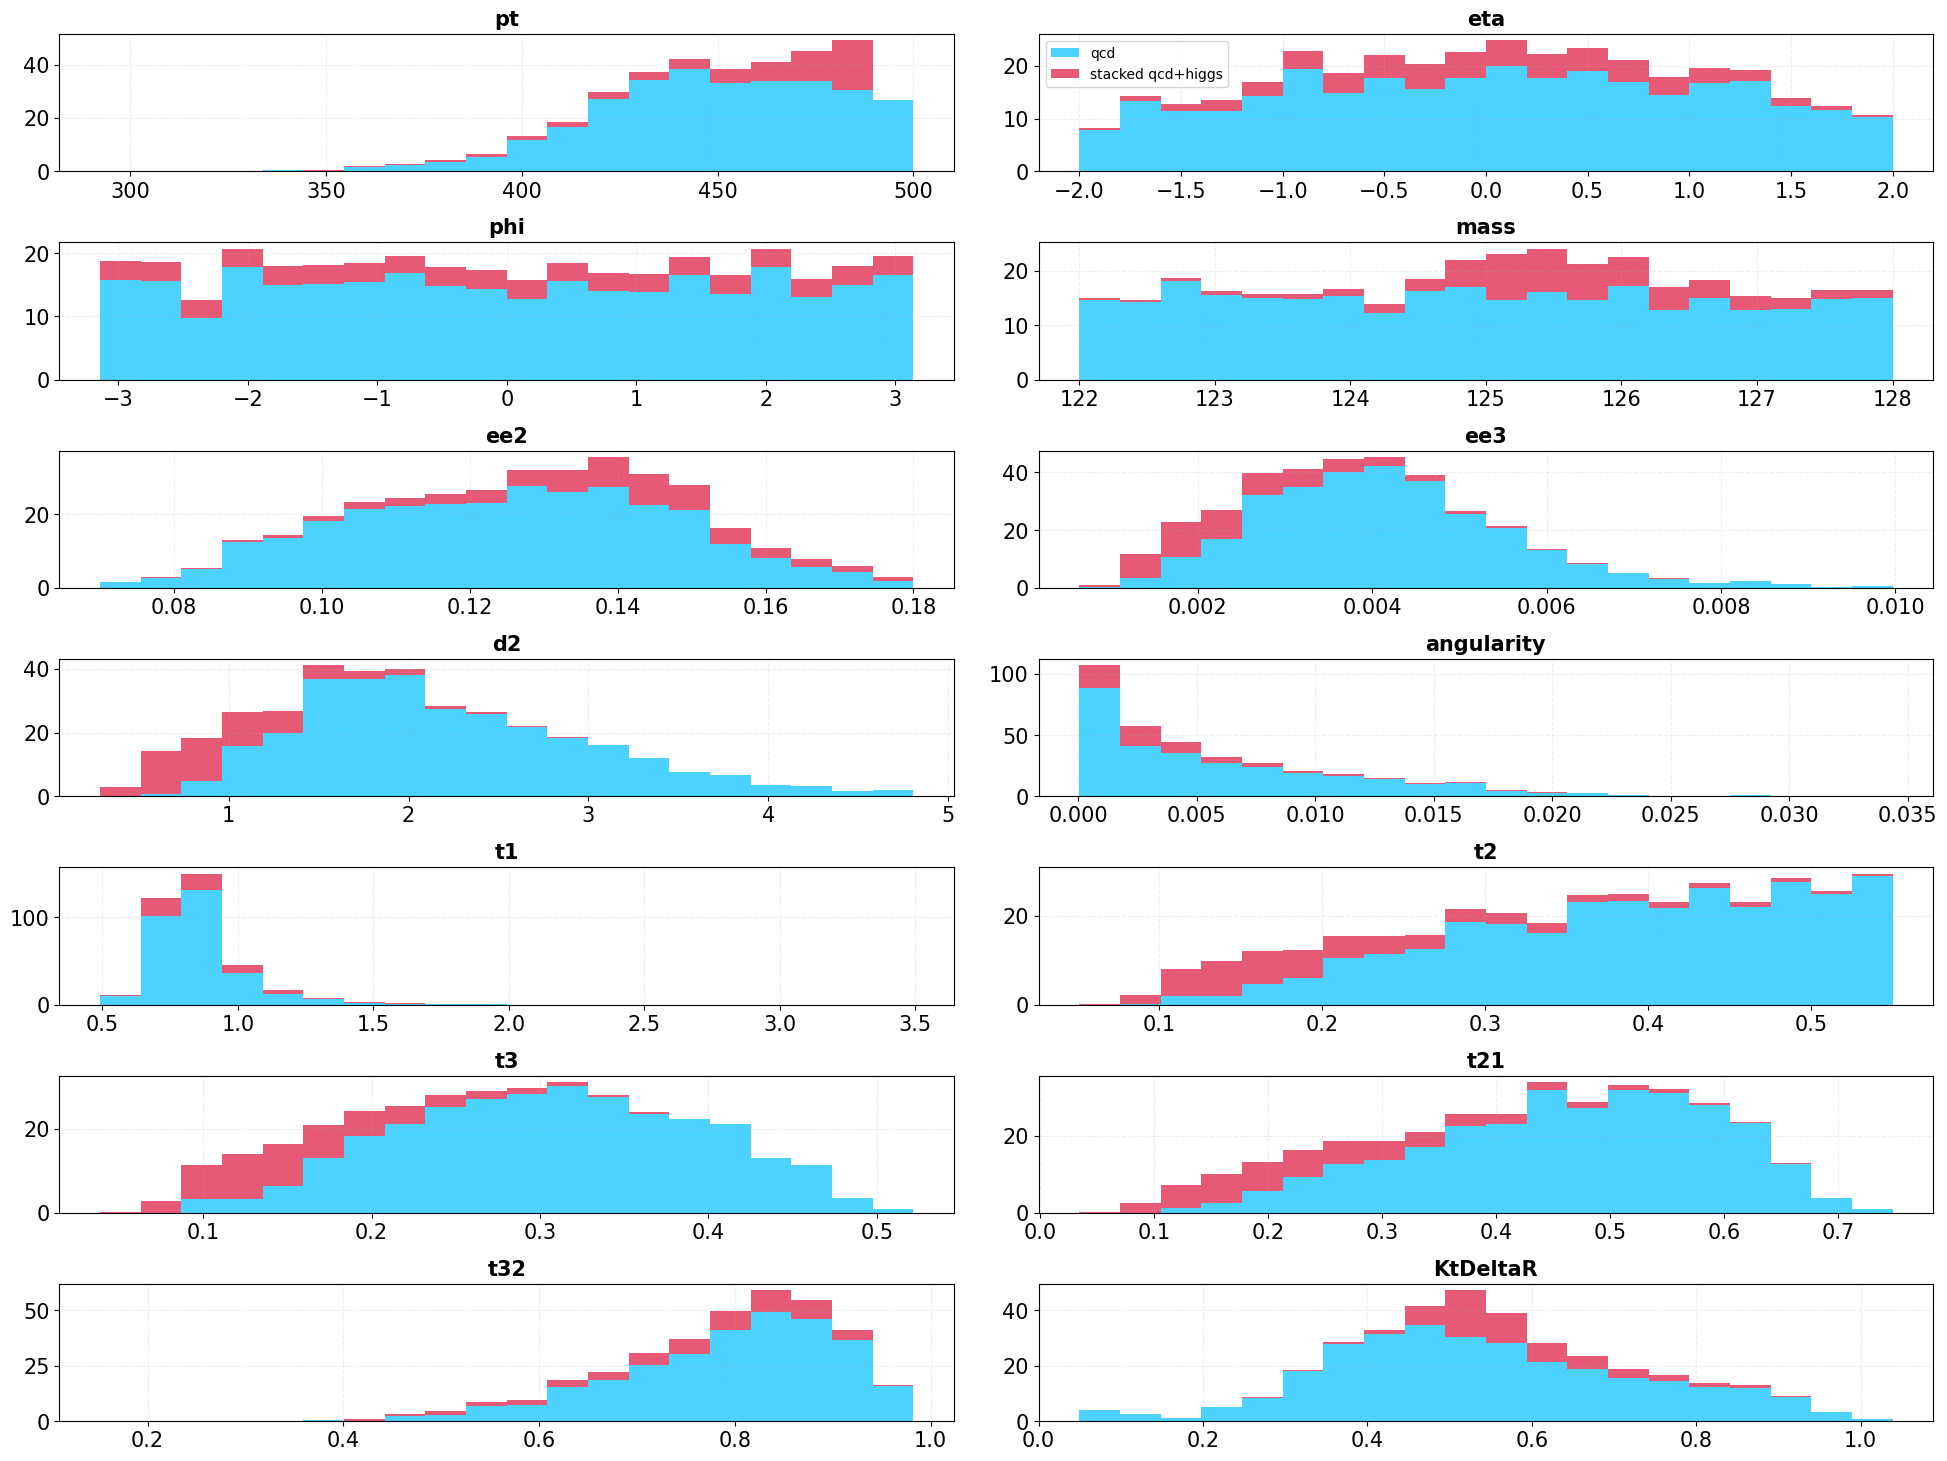

In [87]:
plt.rcParams["figure.figsize"] = (20,15)

fig, ax = plt.subplots(7, 2)
fig.tight_layout(pad=3.0)

for i in range(0,qcd.columns.size):
    
    name = qcd.columns[i]
    X1 = new_qcd[f'{name}']
    X2 = new_higgs[f'{name}']
    
    w1 = np.ones(X1.size)*w_QCD
    w2 = np.ones(X2.size)*w_Higgs
    
    bins = 20
    
    row = math.floor(i/2)
    col = i%2
    
    ax[row, col].tick_params(labelsize = 15)
    ax[row, col].tick_params(labelsize = 15)
    ax[row, col].hist([X1, X2], bins, stacked=True, color=['deepskyblue', 'crimson'], alpha=0.7, weights=[w1, w2], linewidth = 3, label = ['qcd', 'stacked qcd+higgs'])
    ax[row, col].set_title(f'{name}', fontsize = 15, fontweight='bold')
    ax[row, col].grid(linestyle='--', alpha=0.2)
ax[0, 1].legend();

This is our data with the optimal data cuts.

Now, we calculate the significance.

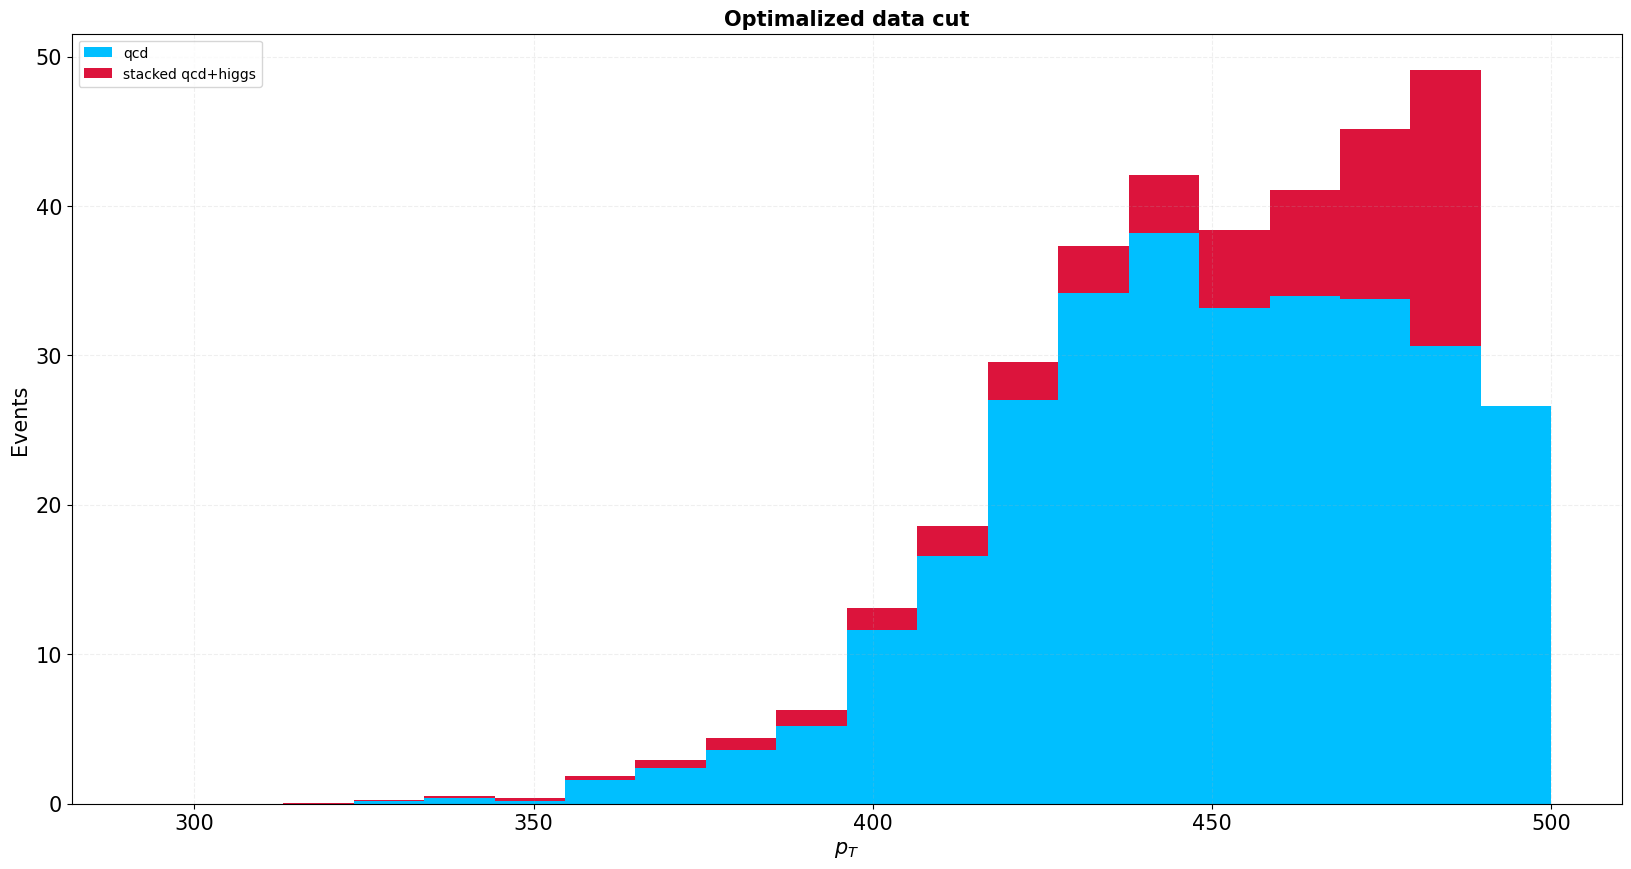

In [88]:
plt.rcParams["figure.figsize"] = (20,10)

N_Higgs = 100
N_QCD = 20000

bins = 70

X1 = new_qcd['pt']
X2 = new_higgs['pt']

bins = 20

w1 = np.ones(X1.size)*w_QCD
w2 = np.ones(X2.size)*w_Higgs

n1array, temp1, temp2 = plt.hist([X1, X2], bins, stacked=True, color=['deepskyblue', 'crimson'], weights=[w1, w2], linewidth = 3, label = ['qcd', 'stacked qcd+higgs'])
plt.tick_params(labelsize = 15)
plt.tick_params(labelsize = 15)
plt.xlabel(r'$p_T$', fontsize = 15)
plt.ylabel('Events', fontsize = 15)
plt.title('Optimalized data cut', fontsize = 15, fontweight='bold')
plt.grid(linestyle='--', alpha=0.2)
plt.legend();

In [89]:
nqcd = n1array[0]
nhiggs = n1array[1]

In [90]:
Nqcd = np.sum(nqcd)
Nhiggs = np.sum(nhiggs)
Nqcd, Nhiggs

(299.39999999999156, 357.6009999999466)

In [91]:
new_significance = Nhiggs/Nqcd**(1/2)
new_significance

20.66678048546718

In [92]:
approx_significance[-1], new_significance # Significance after mass cut, significance after all other cuts

(4.126738755002998, 20.66678048546718)

As we can see, our significance increases by a lot - from 4 to 20 - after making the appropriate cuts.